In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
#importamos el archivo de los créditos
creditos= pd.read_csv('/Bank_Personal_Loan2.csv')

In [52]:
#descripción
print(creditos.describe())

               Age   Experience       Income    Education     Mortgage  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200     1.881000    56.498800   
std      11.463166    11.467954    46.033729     0.839869   101.713802   
min      23.000000    -3.000000     8.000000     1.000000     0.000000   
25%      35.000000    10.000000    39.000000     1.000000     0.000000   
50%      45.000000    20.000000    64.000000     2.000000     0.000000   
75%      55.000000    30.000000    98.000000     3.000000   101.000000   
max      67.000000    43.000000   224.000000     3.000000   635.000000   

             CCAvg       Family  
count  5000.000000  5000.000000  
mean      1.937938     2.396400  
std       1.747659     1.147663  
min       0.000000     1.000000  
25%       0.700000     1.000000  
50%       1.500000     2.000000  
75%       2.500000     3.000000  
max      10.000000     4.000000  


In [53]:
#datos

creditos.head()

,Age,Experience,Income,Education,Mortgage,CCAvg,Family
0,25,1,49,1,0,1.6,4
1,45,19,34,1,0,1.5,3
2,39,15,11,1,0,1.0,1
3,35,9,100,2,0,2.7,1
4,35,8,45,2,0,1.0,4


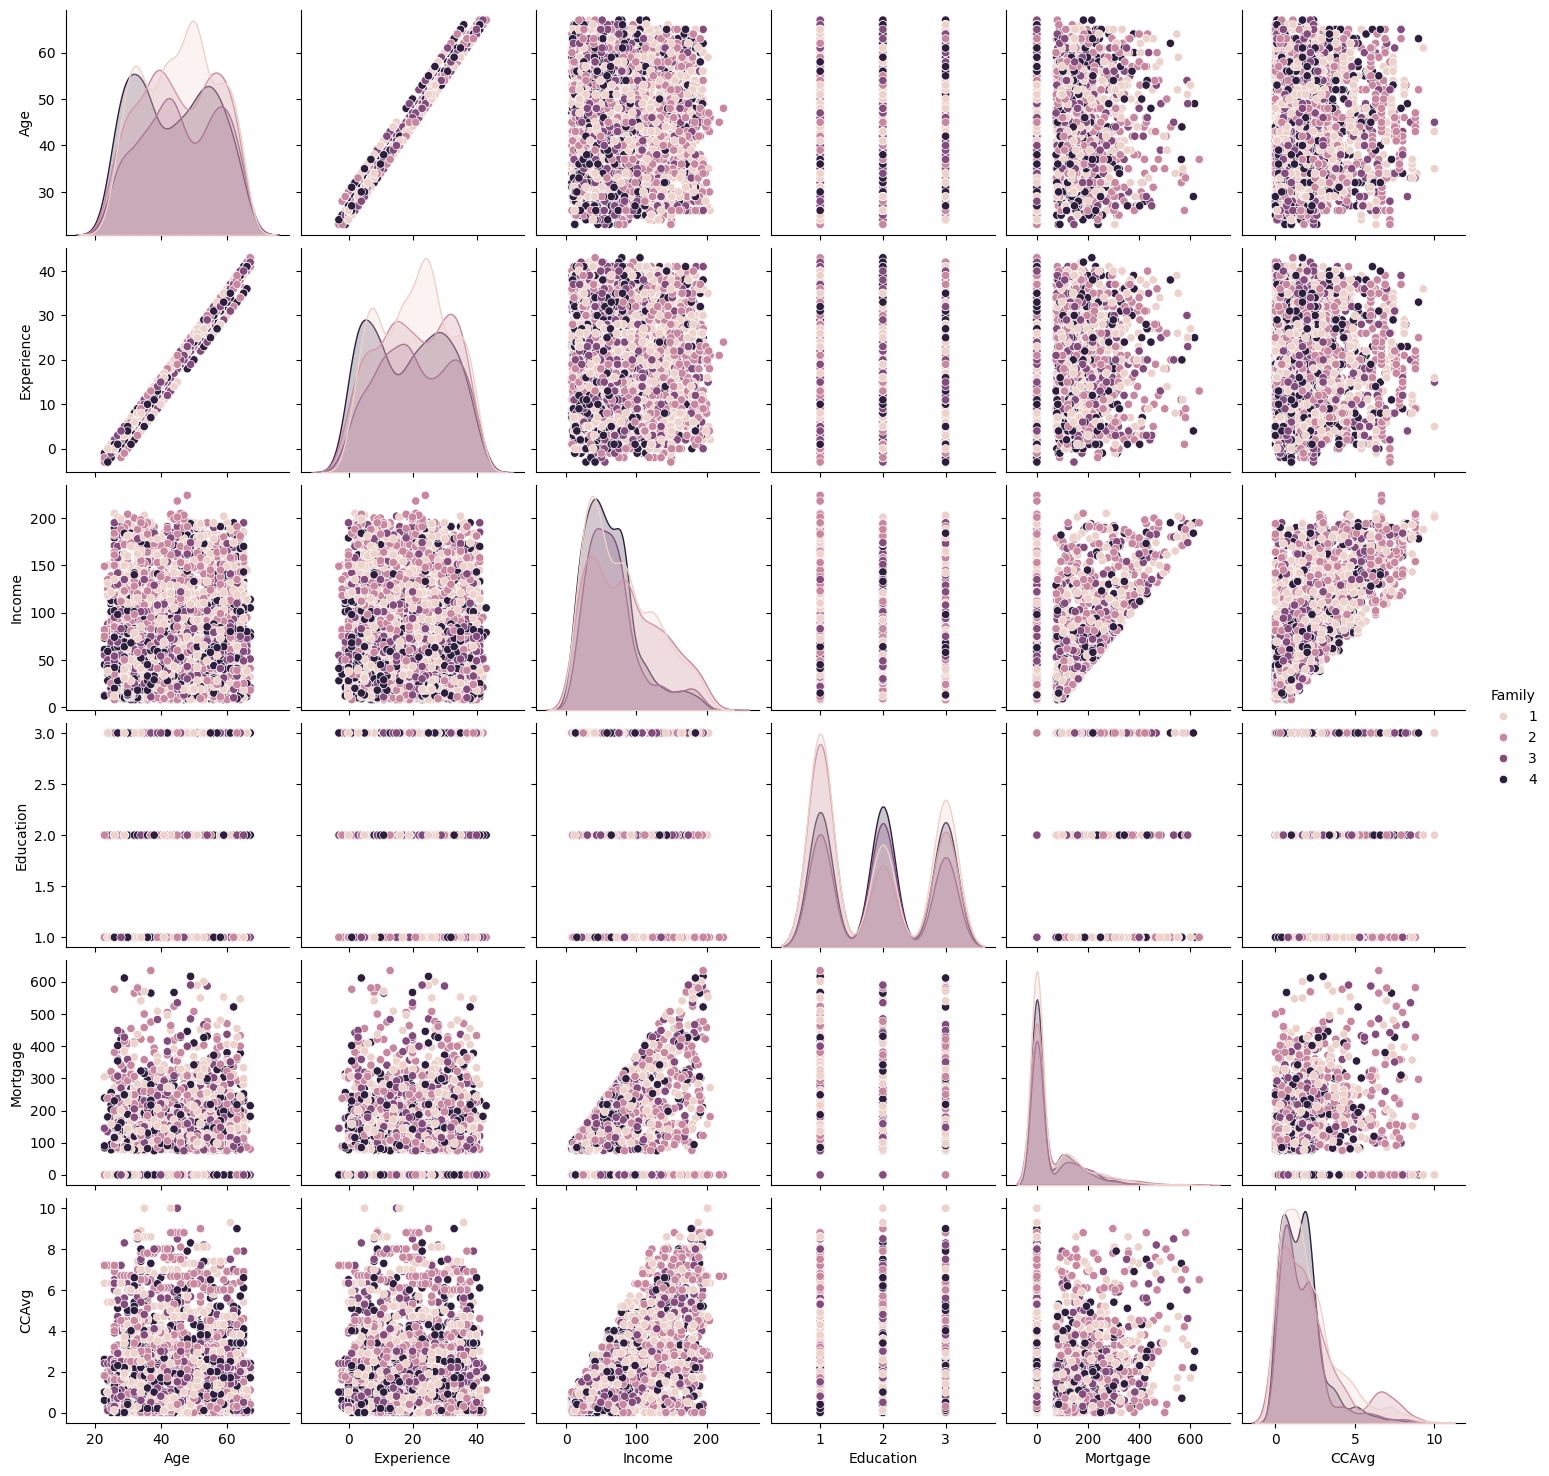

In [49]:
sns.pairplot(creditos, hue="Family")

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [55]:
#separamos variables independientes y dependientes
X= creditos.iloc[:,0:6].values
y= creditos.iloc[:,6].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [56]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#Predicciones

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Precisión

from sklearn.metrics import accuracy_score
print('Precisión: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.29      0.54      0.38       362
           2       0.45      0.17      0.24       346
           3       0.00      0.00      0.00       258
           4       0.28      0.45      0.34       284

    accuracy                           0.30      1250
   macro avg       0.25      0.29      0.24      1250
weighted avg       0.27      0.30      0.26      1250

[[194  45   0 123]
 [180  58   0 108]
 [142  13   0 103]
 [142  14   0 128]]
Precisión:  0.304


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit